In [1]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm
import itertools
from matplotlib import gridspec
from scipy.signal import find_peaks

pd.option_context('display.max_columns', -1)

pd.options.mode.chained_assignment = None #Disabpd.option_context('display.max_columns', 300)le copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps.get_cmap('RdYlBu')

# Angulo inicial de 5 graus e altura 34.5cm

## Dados

In [2]:
#Importando os dados de um arquivo .csv
data_5_345 = pd.read_csv('Dados_PenduloFisico/345mm/dados_5graus.txt', header = 0, sep = '\t', encoding='latin-1')


In [3]:
tempo_5_345 = np.array(data_5_345['Tempo ( s )']) - 3.6900
angulo_5_345 = np.array(data_5_345['Posição angular ( graus )'])

for i,t in enumerate(tempo_5_345):
    if t >= 0:
        tempo_5_345 = tempo_5_345[i:]
        angulo_5_345 = angulo_5_345[i:]
        break


## Gráfico

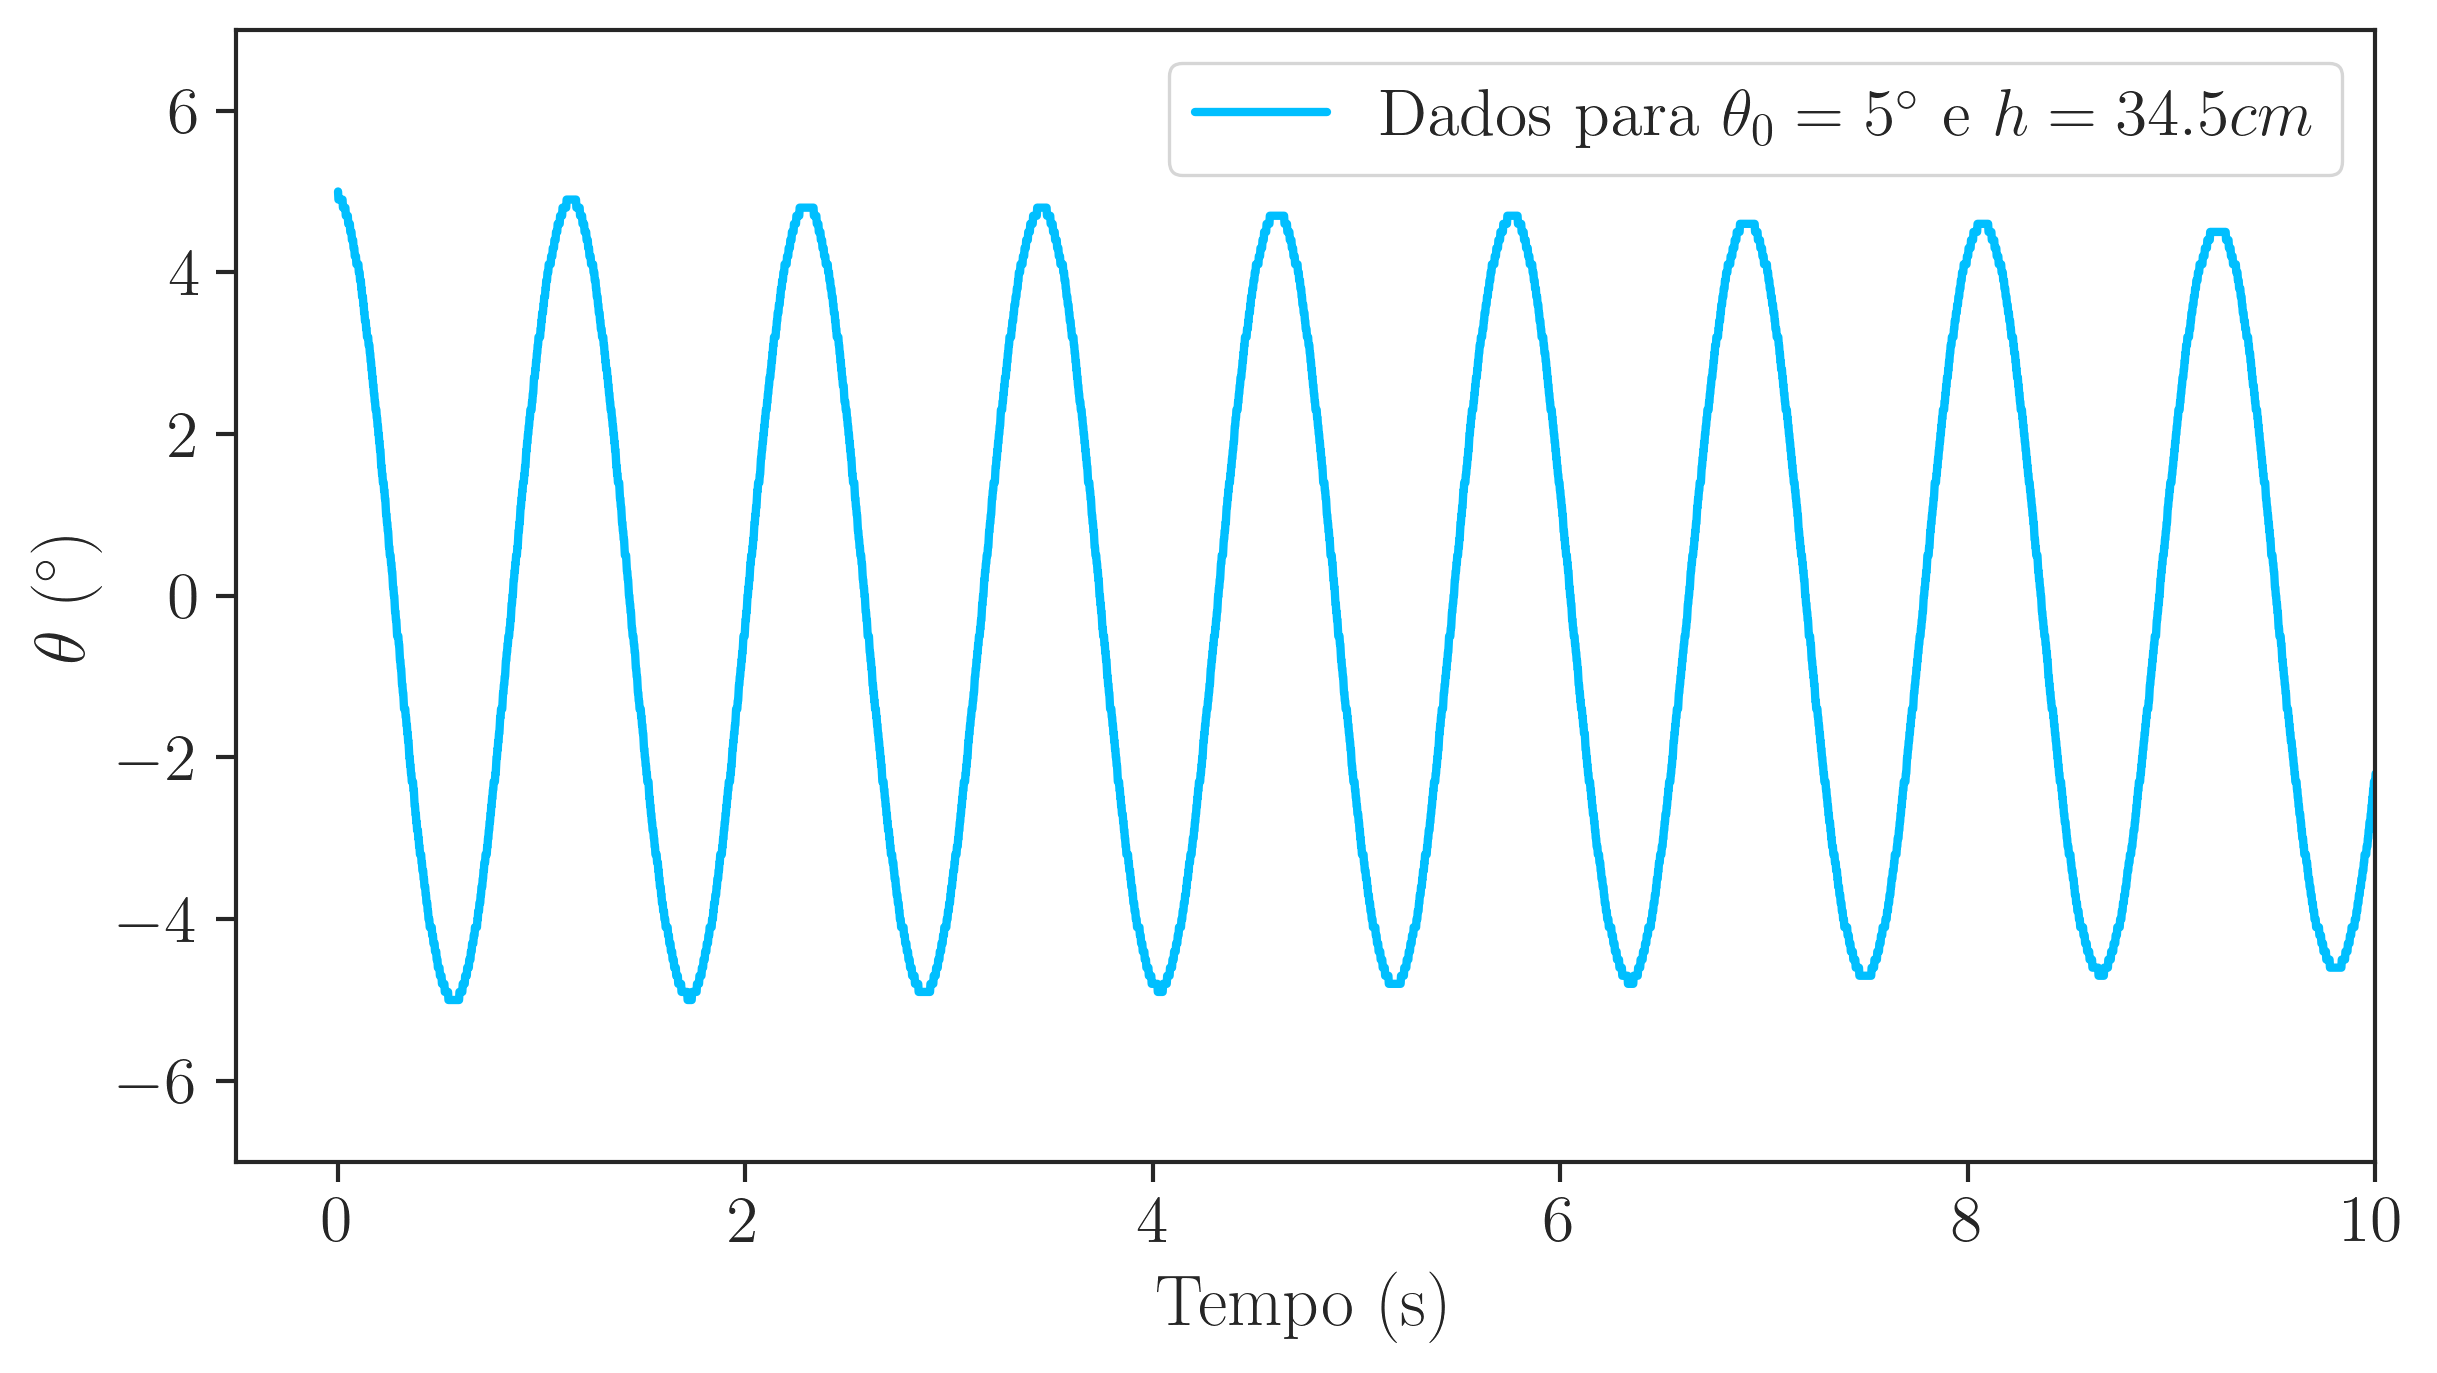

In [4]:
plt.figure(figsize = [9.2,4.9], dpi = 300) 
plt.plot(tempo_5_345, angulo_5_345, lw =2, color = 'deepskyblue', label = r'Dados para $\theta_0 = 5^\circ$ e $h = 34.5cm$')
#Visualização dos picos
#plt.scatter(tempo_5_345[peaks], angulo_5_345[peaks], color = 'red')


plt.ylabel(r'$\theta \ ({}^\circ)$')
plt.xlabel('Tempo (s)')
plt.xlim([-0.5,10])
plt.ylim([-7,7])
plt.legend()
plt.show()

## Calculando o período


In [5]:
peaks_5_345, _ = find_peaks(angulo_5_345, height=0)
period_5_345 = []
for i in range(1,6):
    period_5_345.append(tempo_5_345[peaks_5_345][i] - tempo_5_345[peaks_5_345][i-1])
print('Medidas:',period_5_345)

Medidas: [1.1560000000000006, 1.154, 1.1540000000000004, 1.1560000000000006, 1.154]


## A incerteza do período

O aperelho utilizado para realizar as medidas nos fornecem os instantes de tempo com uma precisão de quatro casas decimais. Tendo isto em vista, iremos adotar a incerteza de cada instante de tempo medido como sendo metade da menor medida que o aparelho consegue realizar, ou seja:

$$\sigma_t{}_{inst} = 5\times 10^{-5} \ (s)$$

Quando calculamos o perído ($T$), estamos medindo a diferença de tempo entre dois picos consecutivos. Para propagarmos o erro instrumental do tempo ao calcularmos esta diferença, devemos somar o quadrado das incertezas. No entanto, como esses erros são sistemáticos, isto é, eles são iguais e consequentemente:

$$\sigma_T{}_{prop} = \sigma_t{}_{inst} \sqrt{2} = 7\times 10^{-5}\ (s)$$

Ao calcularmos a média das 5 medidas de período, devemos também considerar o erro estatístico, ou seja, o desvio padrão da média:

$$\sigma_T{}_{std} = \sqrt{\frac{1}{20}\sum_{i=1}^{5} (T_i - \bar{T})^2}$$

onde $\bar{T}$ é o valor médio do período.

Para combinarmos os dois tipos de erros, nós realizamos a soma quadrática deles e tiramos a raiz:

$$\sigma_{\bar{T}} = \sqrt{\sigma_T{}_{prop}^2 + \sigma_T{}_{std}^2}$$

In [6]:
sigma_std = np.std(period_5_345)/2
sigma_prop = 7e-5
sigma_T_5_345 = np.sqrt(sigma_prop**2 + sigma_std**2)
sigma_T_5_345 = float('{:g}'.format(float('{:.1g}'.format(sigma_T_5_345))))

T_5_345 = np.mean(period_5_345)

print("Período: (%.4f +- %.4f) (s)" % (np.mean(period_5_345), sigma_T_5_345))

Período: (1.1548 +- 0.0005) (s)


# Angulo inicial de 10graus e altura 34.5cm

## Dados

In [7]:
#Importando os dados de um arquivo .csv
data_10_345 = pd.read_csv('Dados_PenduloFisico/345mm/dados_10graus.txt', header = 0, sep = '\t', encoding='latin-1')

In [8]:
tempo_10_345 = np.array(data_10_345['Tempo ( s )']) - 3.2180
angulo_10_345 = np.array(data_10_345['Posição angular ( graus )'])

for i,t in enumerate(tempo_10_345):
    if t >= 0:
        tempo_10_345 = tempo_10_345[i:]
        angulo_10_345 = angulo_10_345[i:]
        break


## Gráfico

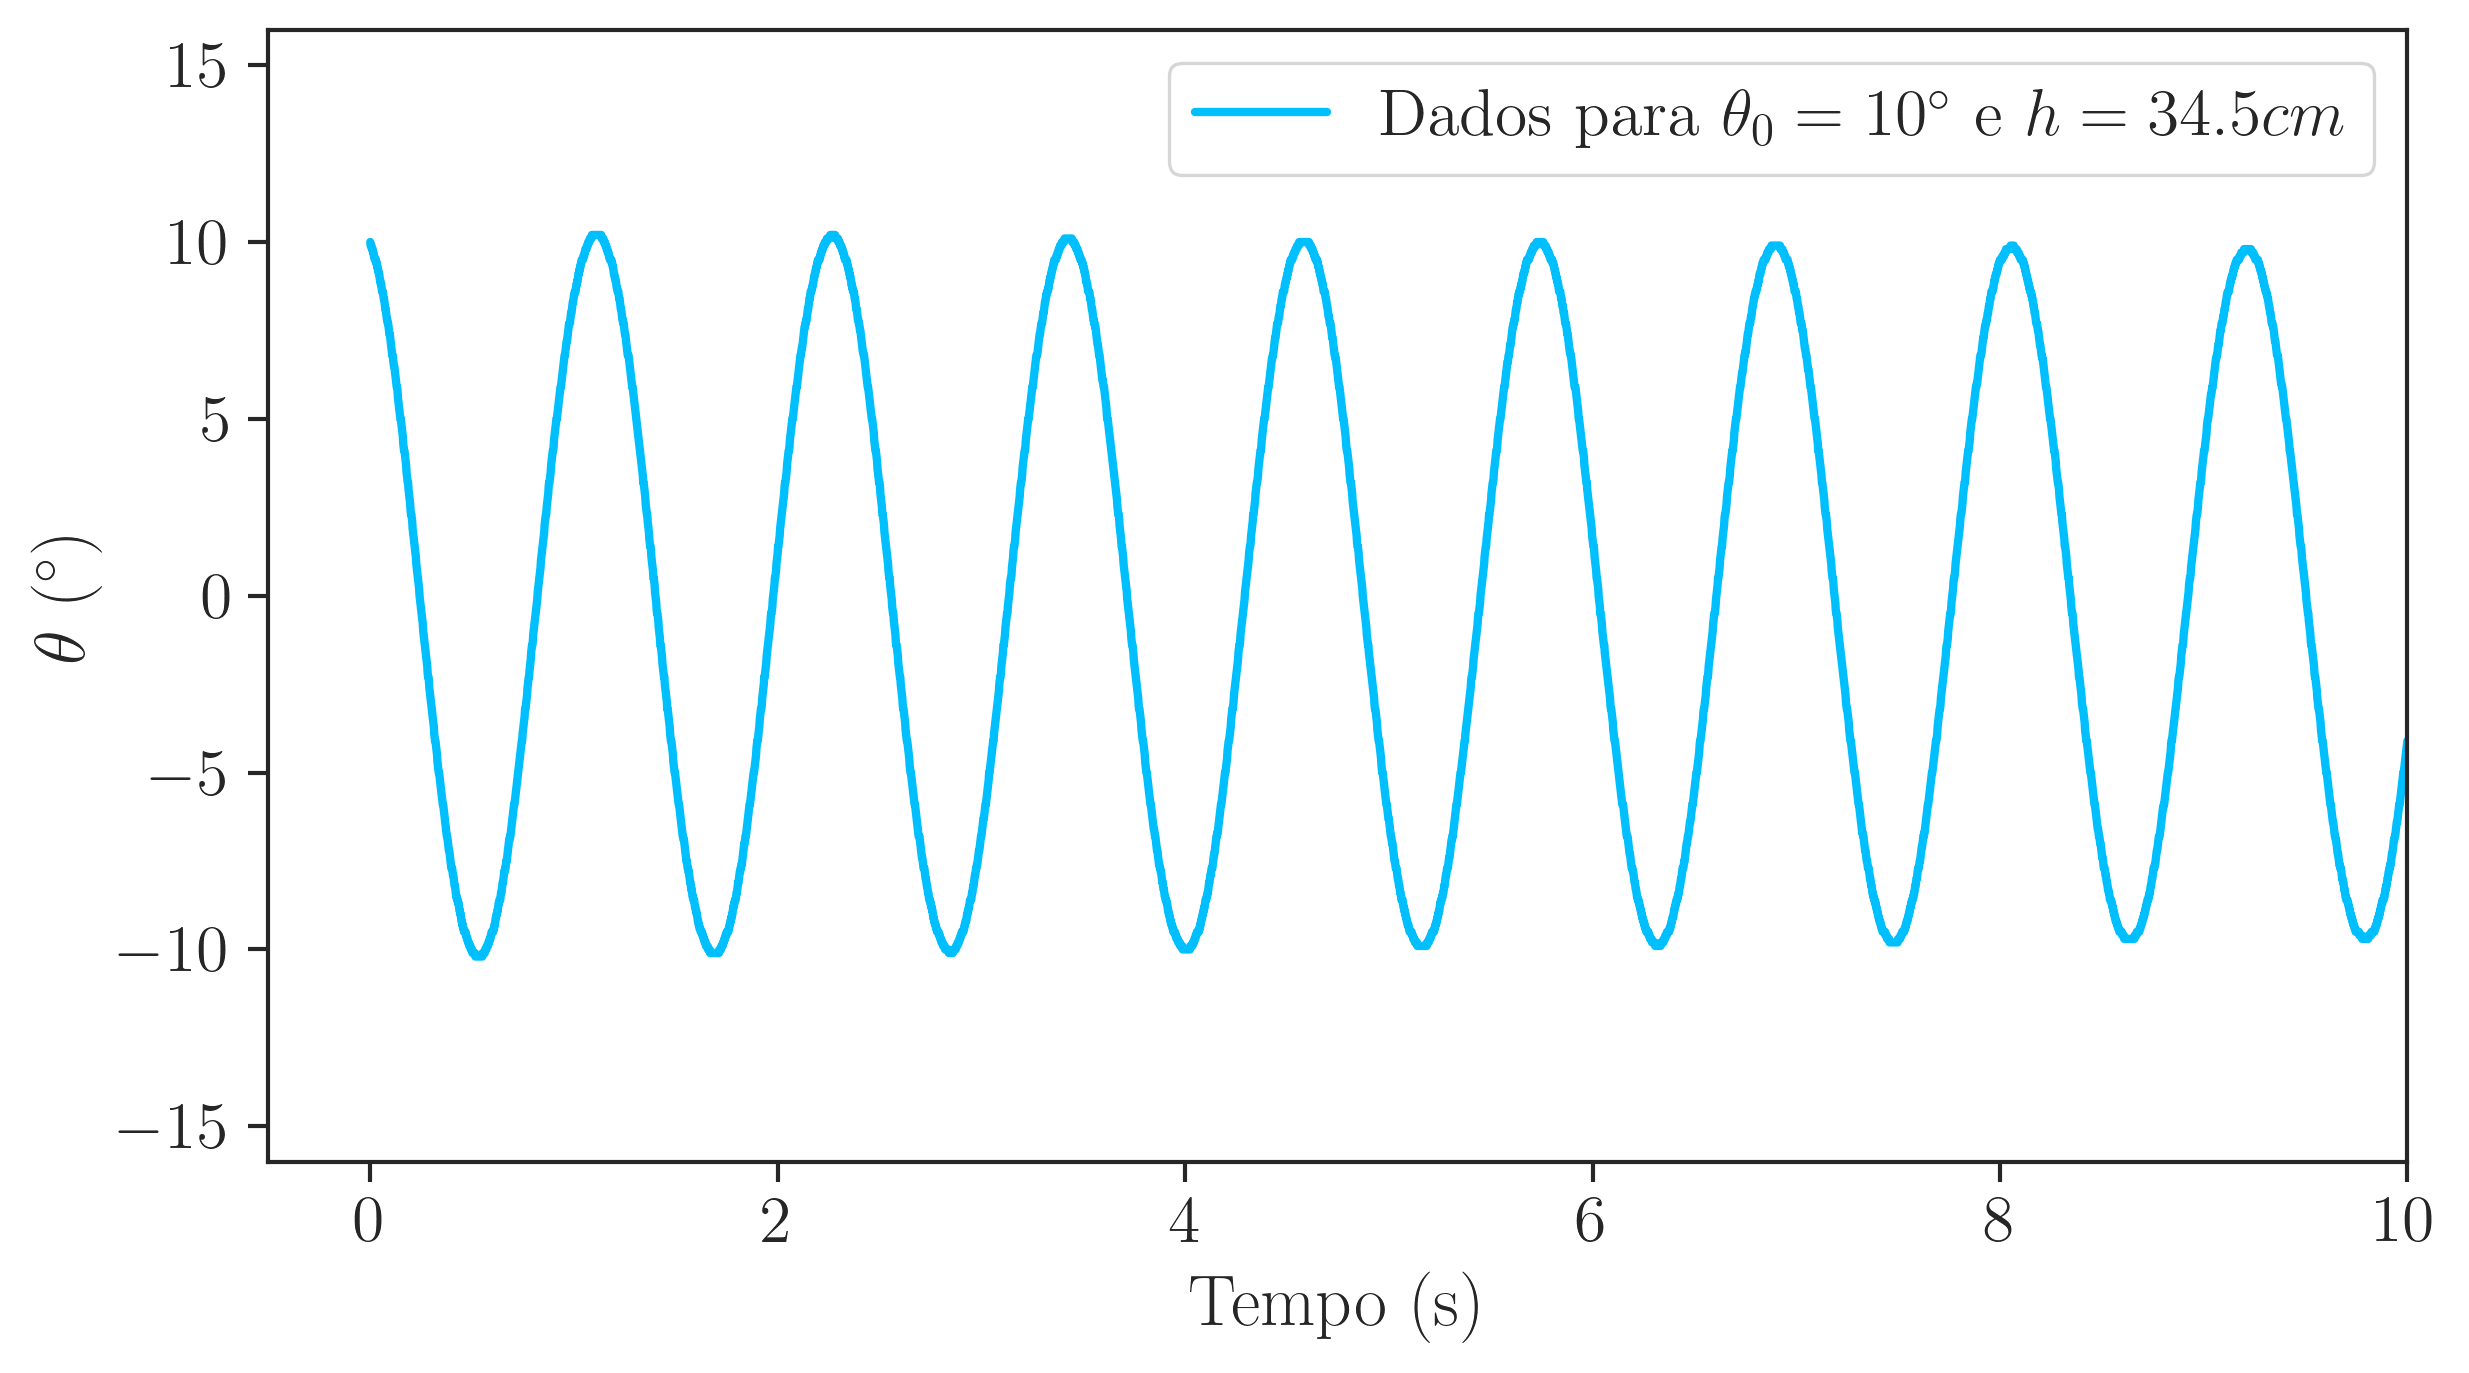

In [9]:
plt.figure(figsize = [9.2,4.9], dpi = 300) 
plt.plot(tempo_10_345, angulo_10_345, lw =2, color = 'deepskyblue', label = r'Dados para $\theta_0 = 10^\circ$ e $h = 34.5cm$')
#Visualização dos picos
#plt.scatter(tempo_5_345[peaks], angulo_5_345[peaks], color = 'red')


plt.ylabel(r'$\theta \ ({}^\circ)$')
plt.xlabel('Tempo (s)')
plt.xlim([-0.5,10])
plt.ylim([-16,16])
plt.legend()
plt.show()

## Calculando o período

In [10]:
peaks_10_345, _ = find_peaks(angulo_10_345, height=0)
period_10_345 = []
for i in range(1,6):
    period_10_345.append(tempo_10_345[peaks_10_345][i] - tempo_10_345[peaks_10_345][i-1])
print(period_10_345)

[1.1600000000000001, 1.1559999999999997, 1.1579999999999995, 1.1580000000000013, 1.1559999999999988]


## A incerteza do período

In [11]:
sigma_std = np.std(period_10_345)/2
sigma_prop = 7e-5
sigma_T_10_345 = np.sqrt(sigma_prop**2 + sigma_std**2)
sigma_T_10_345 = float('{:g}'.format(float('{:.1g}'.format(sigma_T_10_345))))

T_10_345 = np.mean(period_5_345)

print("Período: (%.4f +- %.4f) (s)" % (np.mean(period_10_345), sigma_T_10_345))

Período: (1.1576 +- 0.0008) (s)


# Angulo inicial de 20 graus e altura 34.5cm

## Dados

In [12]:
#Importando os dados de um arquivo .csv
data_20_345 = pd.read_csv('Dados_PenduloFisico/345mm/dados_20graus.txt', header = 0, sep = '\t', encoding='latin-1')

In [13]:
tempo_20_345 = np.array(data_20_345['Tempo ( s )']) - 6.1220
angulo_20_345 = np.array(data_20_345['Posição angular ( graus )'])

for i,t in enumerate(tempo_20_345):
    if t >= 0:
        tempo_20_345 = tempo_20_345[i:]
        angulo_20_345 = angulo_20_345[i:]
        break

## Gráfico

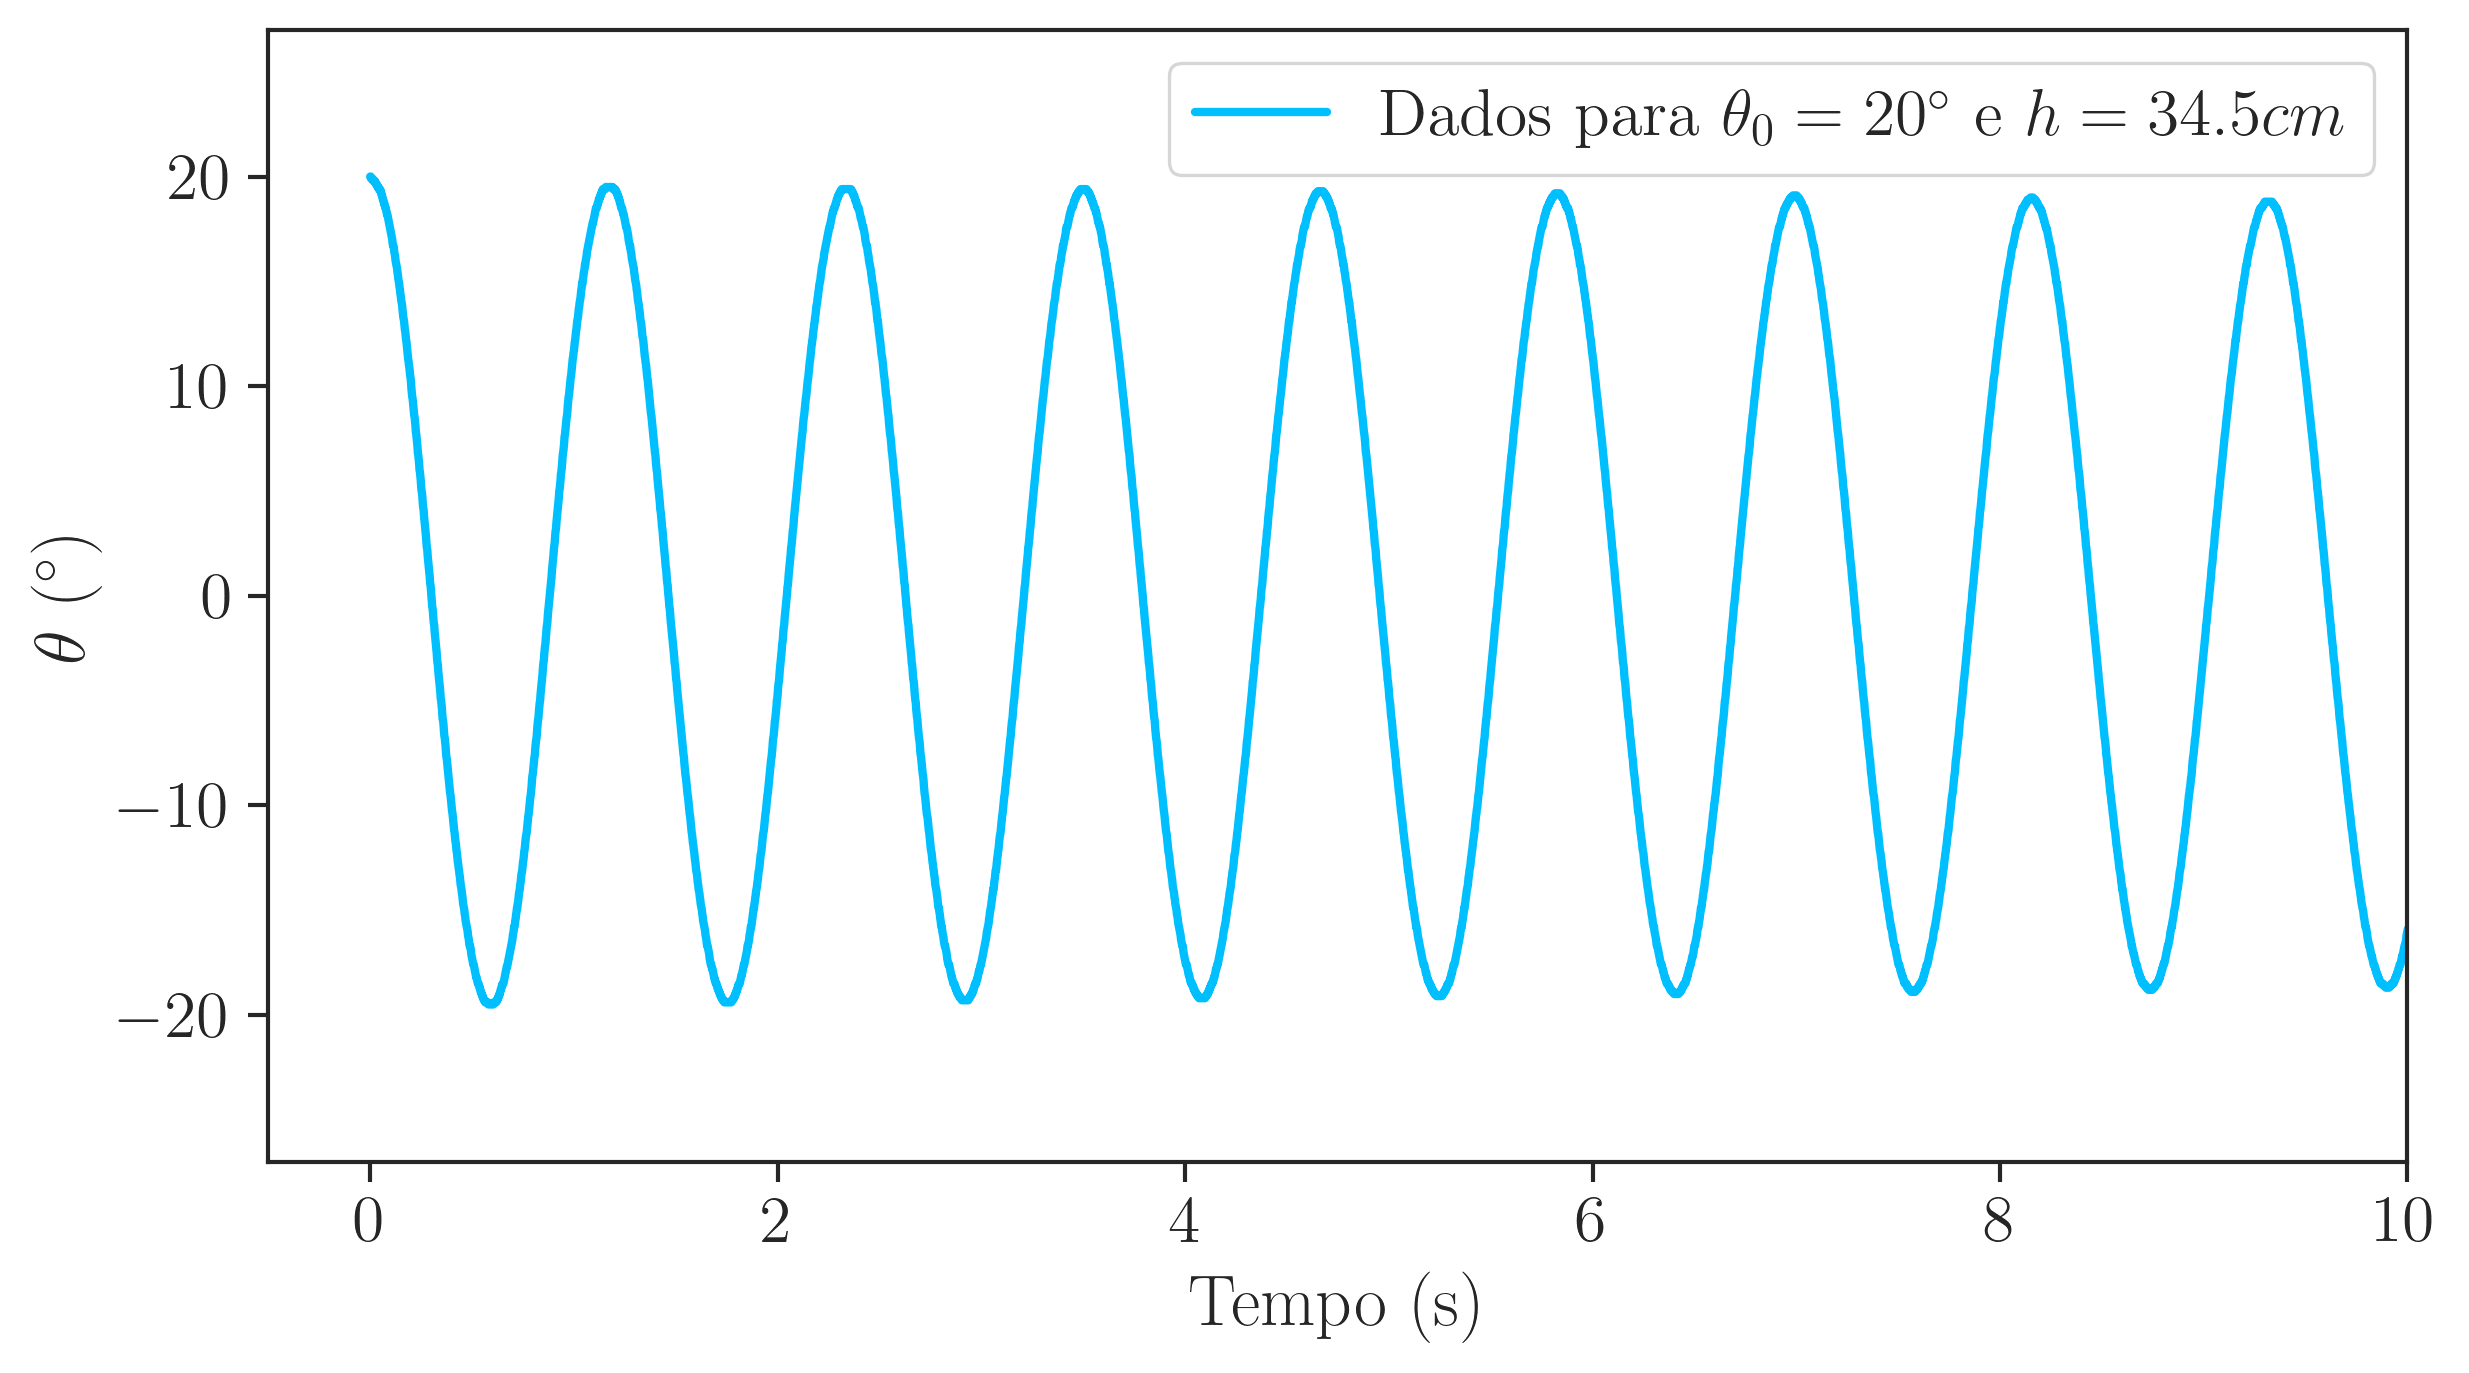

In [14]:
plt.figure(figsize = [9.2,4.9], dpi = 300) 
plt.plot(tempo_20_345, angulo_20_345, lw =2, color = 'deepskyblue', label = r'Dados para $\theta_0 = 20^\circ$ e $h = 34.5cm$')
#Visualização dos picos
#plt.scatter(tempo_5_345[peaks], angulo_5_345[peaks], color = 'red')


plt.ylabel(r'$\theta \ ({}^\circ)$')
plt.xlabel('Tempo (s)')
plt.xlim([-0.5,10])
plt.ylim([-27,27])
plt.legend()
plt.show()

## Calculando o período

In [15]:
peaks_20_345, _ = find_peaks(angulo_20_345, height=0)
period_20_345 = []
for i in range(1,6):
    period_20_345.append(tempo_20_345[peaks_20_345][i] - tempo_20_345[peaks_20_345][i-1])
print(period_20_345)

[1.1640000000000006, 1.1639999999999997, 1.1639999999999997, 1.1639999999999997, 1.1640000000000015]


## A incerteza do período

In [16]:
sigma_std = np.std(period_20_345)/2
sigma_prop = 7e-5
sigma_T_20_345 = np.sqrt(sigma_prop**2 + sigma_std**2)
sigma_T_20_345 = float('{:g}'.format(float('{:.1g}'.format(sigma_T_20_345))))

T_20_345 = np.mean(period_20_345)

print("Período: (%.5f +- %.5f) (s)" % (np.mean(period_20_345), sigma_T_20_345))

Período: (1.16400 +- 0.00007) (s)


# Angulo inicial de 5 graus e altura 31.6cm

## Dados

In [17]:
#Importando os dados de um arquivo .csv
data_5_316 = pd.read_csv('Dados_PenduloFisico/316mm/dados_5graus.txt', header = 0, sep = '\t', encoding='latin-1')

In [18]:
tempo_5_316 = np.array(data_5_316['Tempo ( s )']) - 5.0220
angulo_5_316 = np.array(data_5_316['Posição angular ( graus )'])

for i,t in enumerate(tempo_5_316):
    if t >= 0:
        tempo_5_316 = tempo_5_316[i:]
        angulo_5_316 = angulo_5_316[i:]
        break

## Gráfico


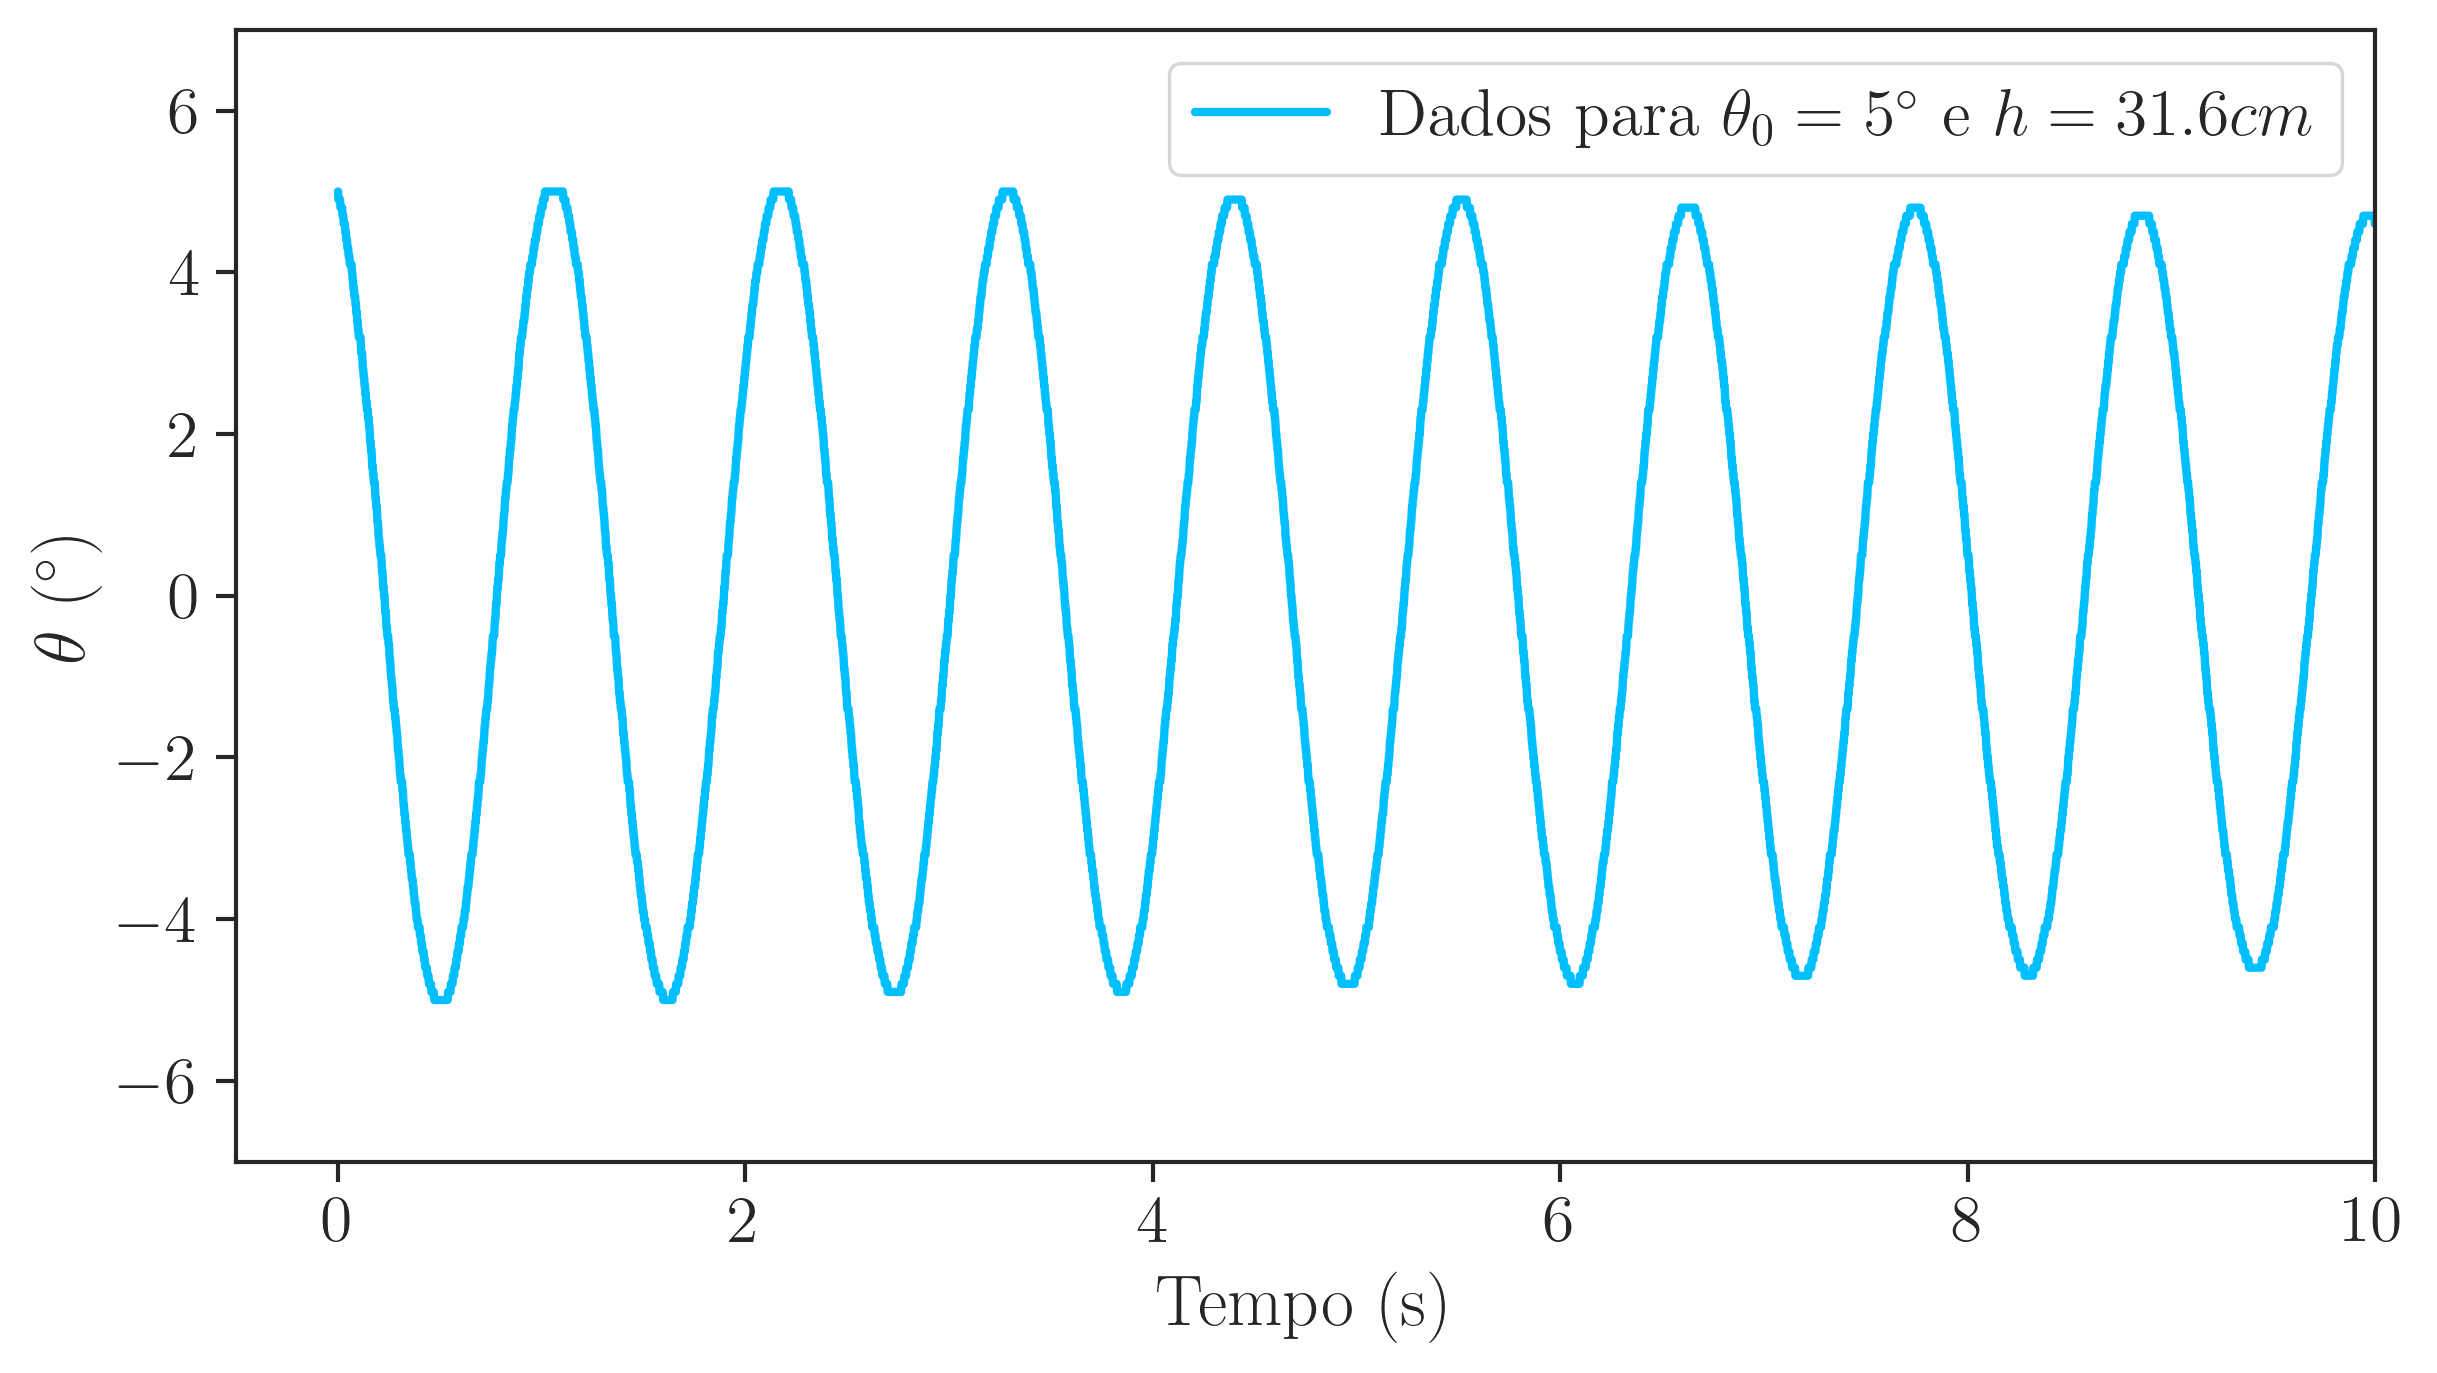

In [19]:
plt.figure(figsize = [9.2,4.9], dpi = 300) 
plt.plot(tempo_5_316, angulo_5_316, lw =2, color = 'deepskyblue', label = r'Dados para $\theta_0 = 5^\circ$ e $h = 31.6cm$')
#Visualização dos picos
#plt.scatter(tempo_5_316[peaks_5_316], angulo_5_316[peaks_5_316], color = 'red')

plt.ylabel(r'$\theta \ ({}^\circ)$')
plt.xlabel('Tempo (s)')
plt.xlim([-0.5,10])
plt.ylim([-7,7])
plt.legend()
plt.show()

## Calculando o período

In [20]:
peaks_5_316, _ = find_peaks(angulo_5_316, height=0)
period_5_316 = []
for i in range(1,6):
    period_5_316.append(tempo_5_316[peaks_5_316][i] - tempo_5_316[peaks_5_316][i-1])
print(period_5_316)

[1.1139999999999999, 1.1140000000000008, 1.112, 1.113999999999999, 1.1140000000000008]


In [21]:
sigma_std = np.std(period_5_316)/2
sigma_prop = 7e-5
sigma_T_5_316 = np.sqrt(sigma_prop**2 + sigma_std**2)
sigma_T_5_316 = float('{:g}'.format(float('{:.1g}'.format(sigma_T_5_316))))

T_5_316 = np.mean(period_5_316)

print("Período: (%.2f +- %.2f) (s)" % (np.mean(period_5_316), sigma_T_5_316))

Período: (1.11 +- 0.00) (s)


# Angulo inicial de 5 graus e altura 27.6cm

## Dados

In [22]:
#Importando os dados de um arquivo .csv
data_5_276 = pd.read_csv('Dados_PenduloFisico/276mm/dados_5graus.txt', header = 0, sep = '\t', encoding='latin-1')

In [23]:
tempo_5_276 = np.array(data_5_276['Tempo ( s )']) - 5.9480
angulo_5_276 = np.array(data_5_276['Posição angular ( graus )'])

for i,t in enumerate(tempo_5_276):
    if t >= 0:
        tempo_5_276 = tempo_5_276[i:]
        angulo_5_276 = angulo_5_276[i:]
        break

## Gráfico

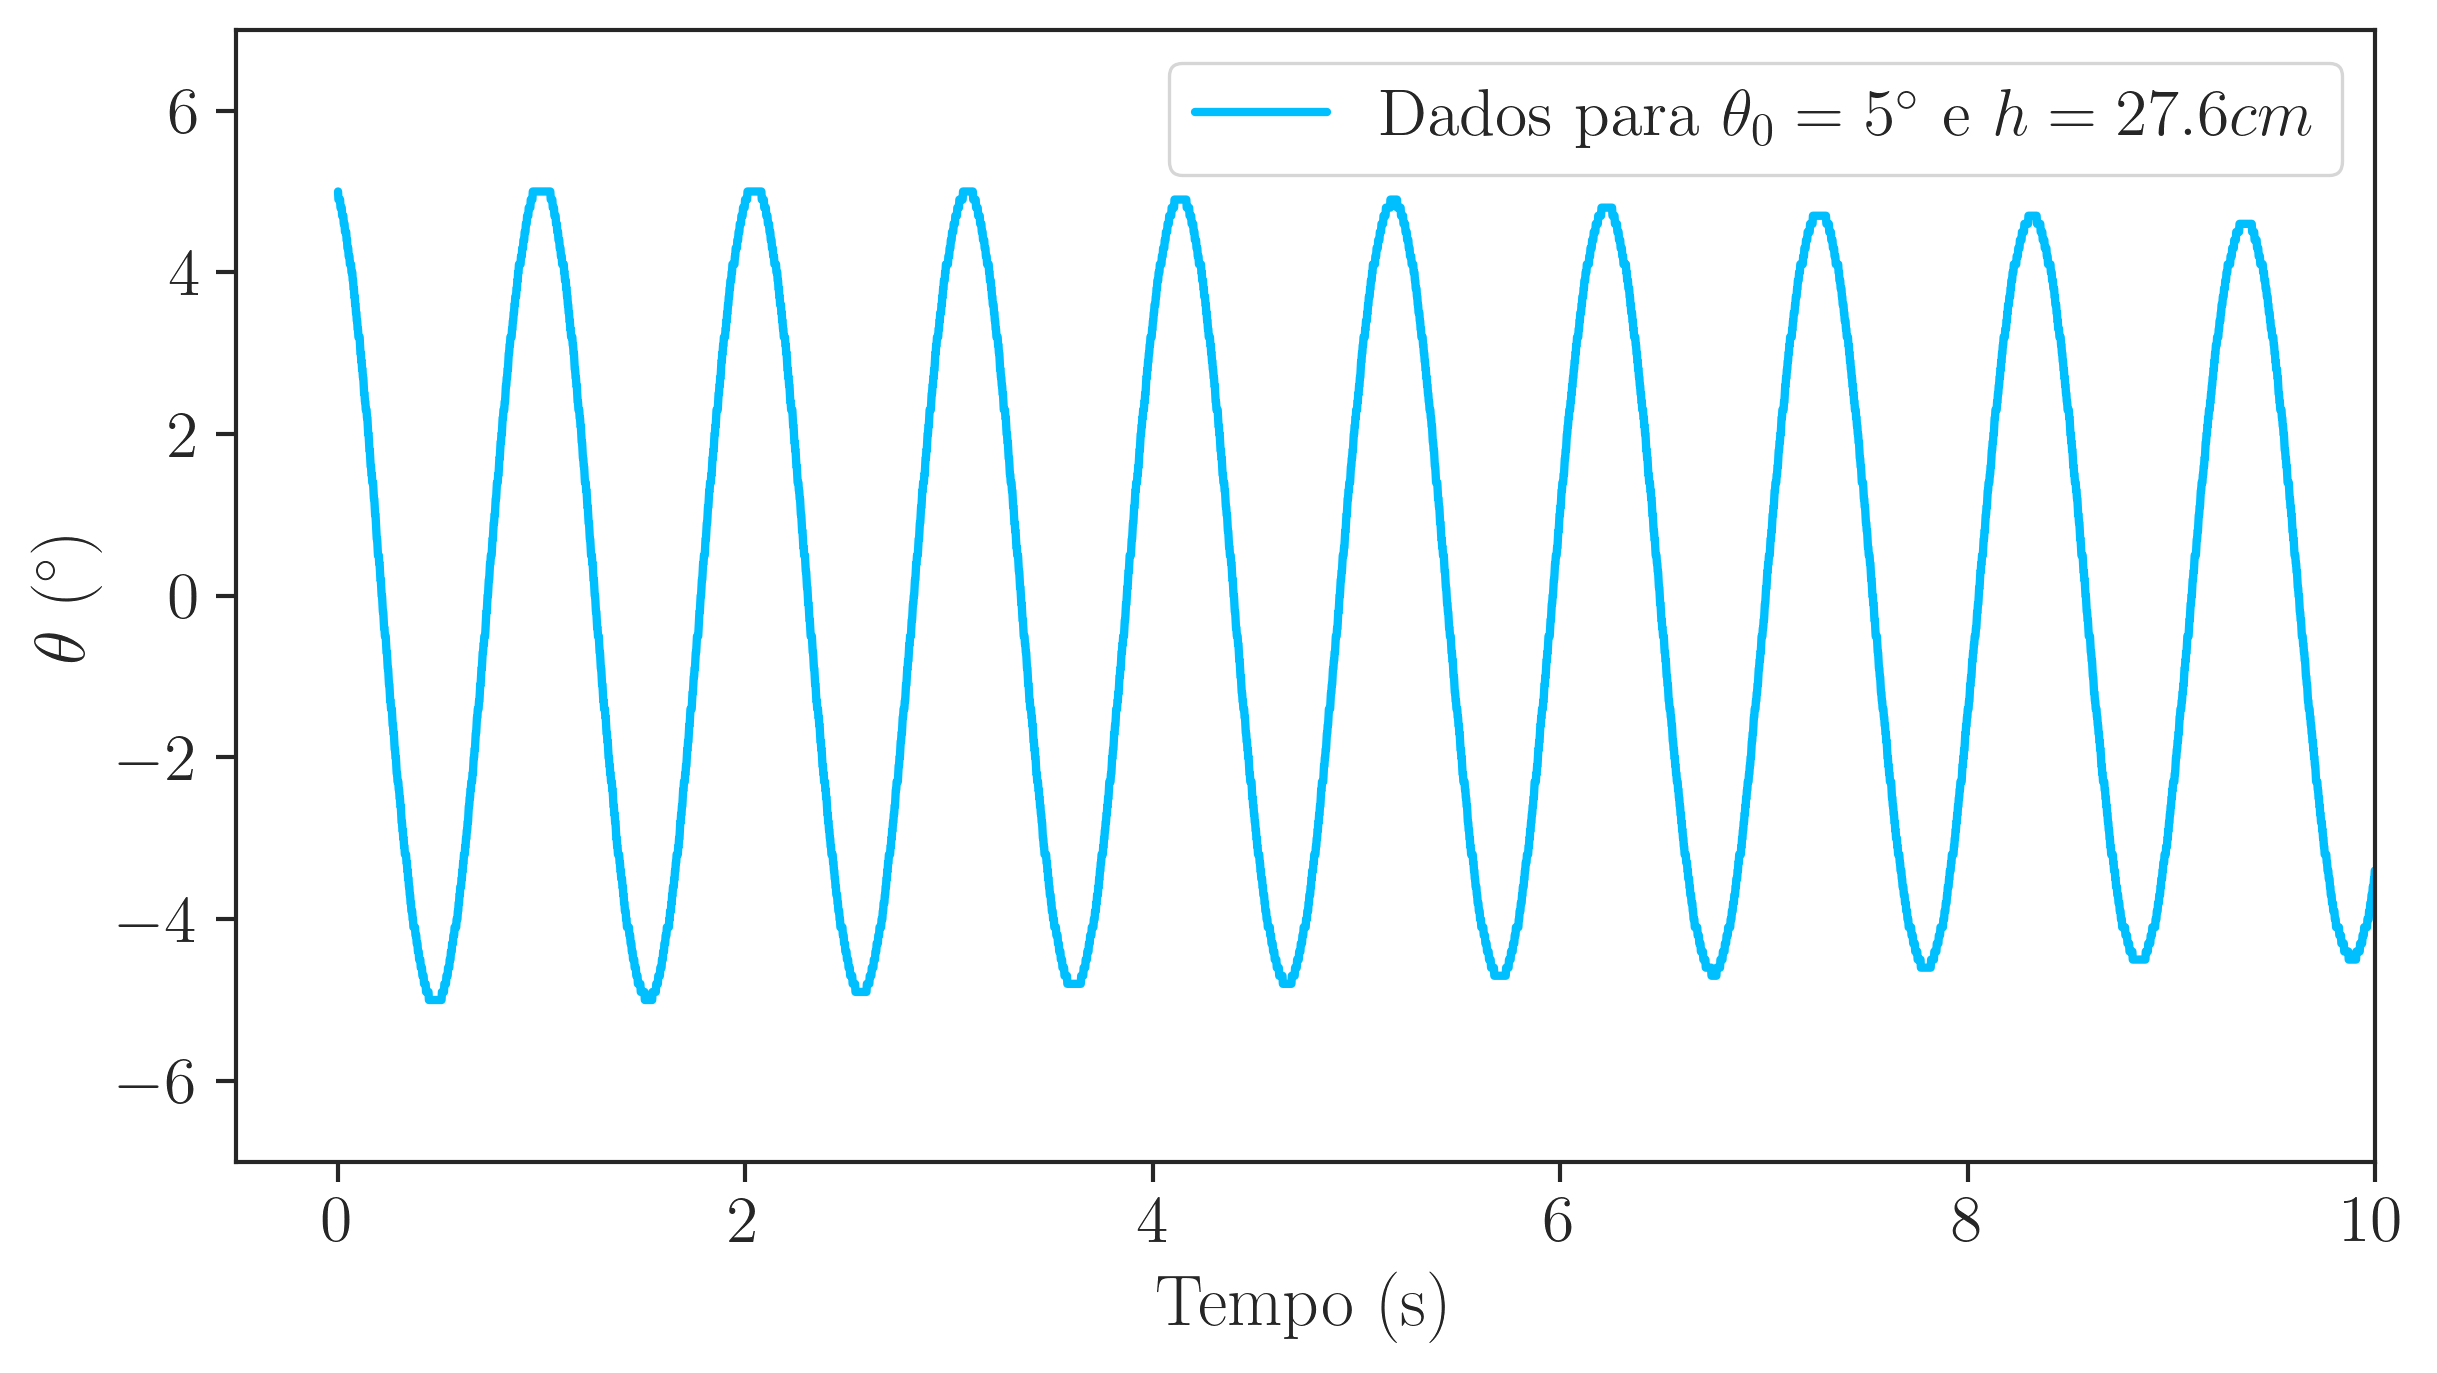

In [24]:
plt.figure(figsize = [9.2,4.9], dpi = 300) 
plt.plot(tempo_5_276, angulo_5_276, lw =2, color = 'deepskyblue', label = r'Dados para $\theta_0 = 5^\circ$ e $h = 27.6cm$')
#Visualização dos picos
#plt.scatter(tempo_5_345[peaks], angulo_5_345[peaks], color = 'red')


plt.ylabel(r'$\theta \ ({}^\circ)$')
plt.xlabel('Tempo (s)')
plt.xlim([-0.5,10])
plt.ylim([-7,7])
plt.legend()
plt.show()

## Calculando o período

In [25]:
peaks_5_276, _ = find_peaks(angulo_5_276, height=0)
period_5_276 = []
for i in range(1,6):
    period_5_276.append(tempo_5_276[peaks_5_276][i] - tempo_5_276[peaks_5_276][i-1])
print(period_5_276)

[1.0460000000000003, 1.0479999999999992, 1.0420000000000016, 1.048, 1.0459999999999994]


## A incerteza do período

In [26]:
sigma_std = np.std(period_5_276)/2
sigma_prop = 7e-5
sigma_T_5_276 = np.sqrt(sigma_prop**2 + sigma_std**2)
sigma_T_5_276 = float('{:g}'.format(float('{:.1g}'.format(sigma_T_5_276))))

T_5_276 = np.mean(period_5_276)

print("Período: (%.3f +- %.3f) (s)" % (np.mean(period_5_276), sigma_T_5_276))

Período: (1.046 +- 0.001) (s)


# Angulo inicial de 5 graus e altura 24.6cm

## Dados

In [27]:
#Importando os dados de um arquivo .csv
data_5_246 = pd.read_csv('Dados_PenduloFisico/246mm/dados_5graus.txt', header = 0, sep = '\t', encoding='latin-1')

In [28]:
tempo_5_246 = np.array(data_5_246['Tempo ( s )']) - 3.7460
angulo_5_246 = np.array(data_5_246['Posição angular ( graus )'])

for i,t in enumerate(tempo_5_246):
    if t >= 0:
        tempo_5_246 = tempo_5_246[i:]
        angulo_5_246 = angulo_5_246[i:]
        break

## Gráfico

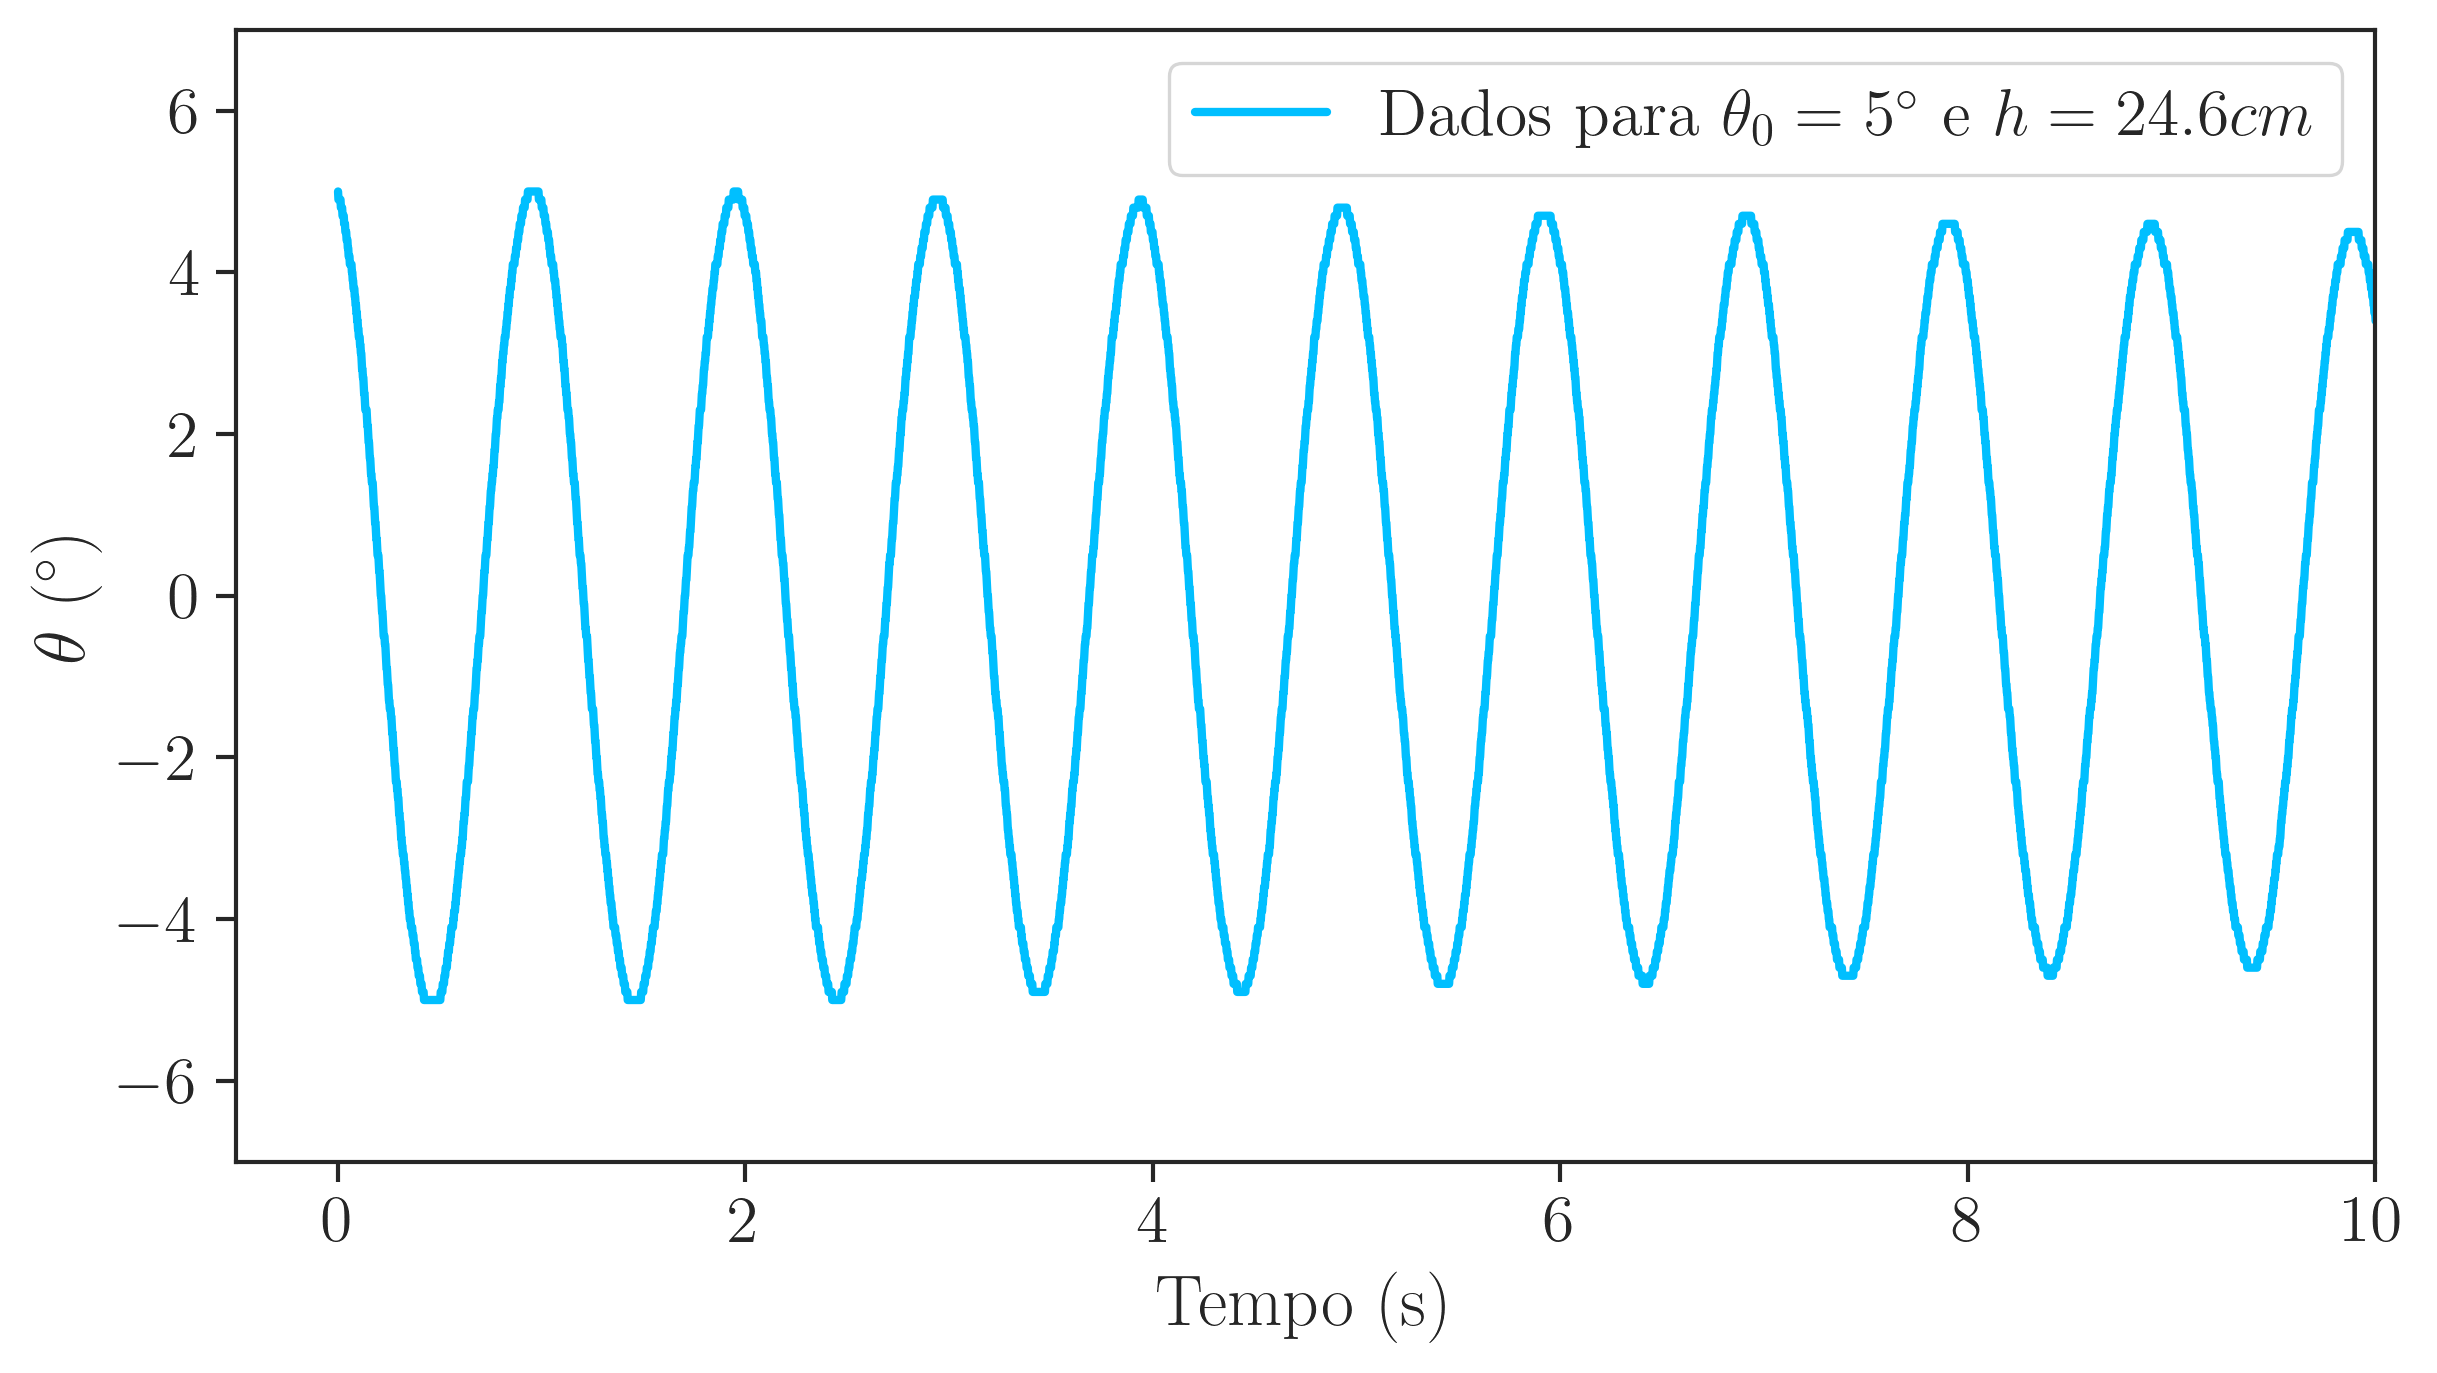

In [29]:
plt.figure(figsize = [9.2,4.9], dpi = 300) 
plt.plot(tempo_5_246, angulo_5_246, lw =2, color = 'deepskyblue', label = r'Dados para $\theta_0 = 5^\circ$ e $h = 24.6cm$')
#Visualização dos picos
#plt.scatter(tempo_5_345[peaks], angulo_5_345[peaks], color = 'red')


plt.ylabel(r'$\theta \ ({}^\circ)$')
plt.xlabel('Tempo (s)')
plt.xlim([-0.5,10])
plt.ylim([-7,7])
plt.legend()
plt.show()

## Calculando o período

In [30]:
peaks_5_246, _ = find_peaks(angulo_5_246, height=0)
period_5_246 = []
for i in range(1,6):
    period_5_246.append(tempo_5_246[peaks_5_246][i] - tempo_5_246[peaks_5_246][i-1])
print(period_5_246)

[0.9940000000000007, 0.992, 0.9959999999999996, 0.9879999999999991, 0.9920000000000009]


## A incerteza do período

In [31]:
sigma_std = np.std(period_5_246)/2
sigma_prop = 7e-5
sigma_T_5_246 = np.sqrt(sigma_prop**2 + sigma_std**2)
sigma_T_5_246 = float('{:g}'.format(float('{:.1g}'.format(sigma_T_5_246))))

T_5_246 = np.mean(period_5_246)

print("Período: (%.3f +- %.3f) (s)" % (np.mean(period_5_246), sigma_T_5_246))

Período: (0.992 +- 0.001) (s)


# O momento de inércia


Pela teoria, nós sabemos que o período do pêndulo físico é dado por:

$$T = 2\pi \sqrt{\frac{I}{Mgh}}$$

Onde $M$ é a massa total e $h$ é a distância entre o eixo de rotação e o centro de massa do sistema, a qual pode ser calculada através das posições do centro de massa da haste e da massa:

$$h = \frac{y_m m + y_h m_h}{m + m_h}$$

O centro de massa da haste encontra-se na metade de seu comprimento. No sistema de coordenadas onde a origem se encontra no eixo de rotação, este ponto tem coordenada $y_h = 17.2cm$. 

No cálculo de $h$, tanto as posições como as massas possuem erros, pois utilizamos uma trena e uma balança para medi-las. No entanto, a balança utilizada apresenta uma precisão grande e seu erro é bem pequeno quando comparado ao da trena. Desta forma, consideraremos que o erro dominante é o proveniente da trena e propagaremos para $h$ apenas o erro das posições:

$$\sigma_h = \sqrt{\left(\frac{\partial h}{\partial y_h}\right)^2\sigma_{y_h}^2 + \left(\frac{\partial h}{\partial y_m}\right)^2\sigma_{y_m}^2}$$


Como $h = \frac{y_m m + y_h m_h}{m + m_h}$ e $\sigma_{y_h} = \sigma_{y_m} = \sigma_{trena}$:

$$\sigma_h = \sqrt{\left(\frac{m_h}{m + m_h}\right)^2\sigma_{y_h}^2 + \left(\frac{m}{m + m_h}\right)^2\sigma_{y_m}^2}$$
$$\sigma_h = \frac{ \sigma_{trena}}{(m+m_h)}\sqrt{m_h^2 + m^2}$$





In [32]:
y_h = 17.2e-2 #m
y_m = np.array([34.5, 31.6, 27.6, 24.6])*1e-2 #m

sigma_y = 5e-4 #m
m = 75.46 *1e-3 #kg
m_h = 27.75 *1e-3 #kg

h = (m * y_m + m_h* y_h)/(m + m_h)

sigma_h = sigma_y/(m + m_h) * np.sqrt(m**2 + m_h**2)
sigma_h = float('{:g}'.format(float('{:.1g}'.format(sigma_h))))
print(h, sigma_h)

[0.29848561 0.27728282 0.24803759 0.22610367] 0.0004


Agora que temos os valores de $h$ para cada conjunto de dados e sua incerteza, vamos retornar a fórmula do período e isolar o momento de inércia:

$$I = \left(\frac{T}{2\pi}\right)^2 M g h$$


Para encontrarmos o erro associado ao momento de inércia, devemos propagar o erro do período e da distância $h$ da seguinte forma:

$$\sigma_I = \sqrt{\left(\frac{\partial I}{\partial T}\right)^2\sigma_T^2 + \left(\frac{\partial I}{\partial h}\right)^2\sigma_h^2}$$

Como $I = \left(\frac{T}{2\pi}\right)^2 M g h$, então:

$$\sigma_I = \sqrt{\left(\frac{T}{2\pi^2} M g h\right)^2\sigma_T^2 + \left(\left(\frac{T}{2\pi}\right)^2 M g \right)^2\sigma_h^2}$$

$$\sigma_I = \left(\frac{T}{2\pi}\right)^2 M g h\sqrt{\left(\frac{2\sigma_T}{T}\right)^2 + \left(\frac{\sigma_h}{h} \right)^2}$$

In [78]:
# theta_0 = 5 e y_m = 345mm:
i_5_345 = (T_5_345/(2*np.pi))**2 * (m + m_h) * 9.8 * h[0]
sigma_i_5_345 = i_5_345*np.sqrt((2*sigma_T_5_345/T_5_345)**2 + (sigma_h/h[0])**2)
sigma_i_5_345 =float('{:g}'.format(float('{:.1g}'.format(sigma_i_5_345))))

print('I_5_345: (%.5f +- %.5f) (kg m^2)' % (i_5_345, sigma_i_5_345) )
print()

# theta_0 = 10 e y_m = 345mm:
i_10_345 = (T_10_345/(2*np.pi))**2 * (m + m_h) * 9.8 * h[0]
sigma_i_10_345 = i_10_345*np.sqrt((2*sigma_T_10_345/T_10_345)**2 + (sigma_h/h[0])**2)
sigma_i_10_345 =float('{:g}'.format(float('{:.1g}'.format(sigma_i_10_345))))

print('I_10_345: (%.5f +- %.5f) (kg m^2)' % (i_10_345, sigma_i_10_345) )
print()

# theta_0 = 20 e y_m = 345mm:
i_20_345 = (T_20_345/(2*np.pi))**2 * (m + m_h) * 9.8 * h[0]
sigma_i_20_345 = i_20_345*np.sqrt((2*sigma_T_20_345/T_20_345)**2 + (sigma_h/h[0])**2)
sigma_i_20_345 =float('{:g}'.format(float('{:.1g}'.format(sigma_i_20_345))))

print('I_20_345: (%.5f +- %.5f) (kg m^2)' % (i_20_345, sigma_i_20_345) )
print()

# theta_0 = 5 e y_m = 316mm:
i_5_316 = (T_5_316/(2*np.pi))**2 * (m + m_h) * 9.8 * h[1]
sigma_i_5_316 = i_5_316*np.sqrt((2*sigma_T_5_316/T_5_316)**2 + (sigma_h/h[1])**2)
sigma_i_5_316 =float('{:g}'.format(float('{:.1g}'.format(sigma_i_5_316))))

print('I_5_316: (%.5f +- %.5f) (kg m^2)' % (i_5_316, sigma_i_5_316) )
print()

# theta_0 = 5 e y_m = 276mm:
i_5_276 = (T_5_276/(2*np.pi))**2 * (m + m_h) * 9.8 * h[2]
sigma_i_5_276 = i_5_276*np.sqrt((2*sigma_T_5_276/T_5_276)**2 + (sigma_h/h[2])**2)
sigma_i_5_276 =float('{:g}'.format(float('{:.1g}'.format(sigma_i_5_276))))

print('I_5_276: (%.5f +- %.5f) (kg m^2)' % (i_5_276, sigma_i_5_276) )
print()

# theta_0 = 5 e y_m = 246mm:
i_5_246 = (T_5_246/(2*np.pi))**2 * (m + m_h) * 9.8 * h[3]
sigma_i_5_246 = i_5_246*np.sqrt((2*sigma_T_5_246/T_5_246)**2 + (sigma_h/h[3])**2)
sigma_i_5_246 =float('{:g}'.format(float('{:.1g}'.format(sigma_i_5_246))))

print('I_5_246: (%.5f +- %.5f) (kg m^2)' % (i_5_246, sigma_i_5_246) )
print()


#Armazenando esses valores em um vetor

inertia_m = np.array([np.mean([i_5_345,i_10_345]), i_5_316, i_5_276, i_5_246])
sigma_inertia_m = np.array([sigma_i_5_345, sigma_i_5_316, sigma_i_5_276, sigma_i_5_246])

I_5_345: (0.01020 +- 0.00002) (kg m^2)

I_10_345: (0.01020 +- 0.00002) (kg m^2)

I_20_345: (0.01036 +- 0.00001) (kg m^2)

I_5_316: (0.00881 +- 0.00001) (kg m^2)

I_5_276: (0.00695 +- 0.00002) (kg m^2)

I_5_246: (0.00571 +- 0.00002) (kg m^2)



Pela teoria, o momento de inércia total do pêndulo é a soma dos momentos de inércia da haste e da massa pendurada:

$$I = I_h + I_m$$

Para a massa presa a haste iremos aproximá-la como uma massa pontual, ao invés de um cilíndro, que é a sua fora. Deste modo, $I_m = m y_m^2$. Logo:

$$I = I_h + m y_m^2 $$

O momento de inércia da haste pode ser obtido através do teorema de Stainer, ou teorema dos eixos paralelos, o qual diz que:

$$I_h = I_h{}_{CM} + m_h y_h^2$$

Modelando a haste como uma barra com densidade uniforme de massa, o momento de inércia para o eixo de rotação passando pelo centro de massa é $I_h{}_{CM} = \frac{1}{12} m_h l^2$. Portanto:

$$I = \frac{1}{12} m_h l^2 + m_h y_h^2 + m y_m^2$$

Utilizando que $m_h = 27.75\times 10^-3 kg$, $m = 75.46\times 10^{-3}kg$, $l= 0.38 m$ e $y_h = 0.172m$:

$$I = 75.46\times 10^{-3} y_h^2 + 0.001154881$$

Esta é a nossa estimativa teórica para o momento de inércia em função da distância do centro do peso preso a haste até o eixo de rotação.

### A distância do peso pendurado até o eixo de rotação ao quadrado

Como vimos, a nossa estimativa teórica é que o momento de inércia dependa do quaderado de $y_m$. Portanto temos que calcular esses valores e também propagar a incerteza da seguinte forma:

$$\sigma_{y_m^2} = \bigg\vert\frac{dy_m^2}{y_m}\bigg\vert\sigma_{y_m} = 2y_m\sigma_{y_m}$$

In [77]:
y_m_sq = y_m**2

sigma_y_m_sq = 2*y_m*sigma_y
sigma_y_m_sq = [float('{:g}'.format(float('{:.1g}'.format(sigma)))) for sigma in sigma_y_m_sq]

print('y_m^2:', y_m_sq)
print('sigma_m_sq:', sigma_y_m_sq)

y_m^2: [0.119025 0.099856 0.076176 0.060516]
sigma_m_sq: [0.0003, 0.0003, 0.0003, 0.0002]


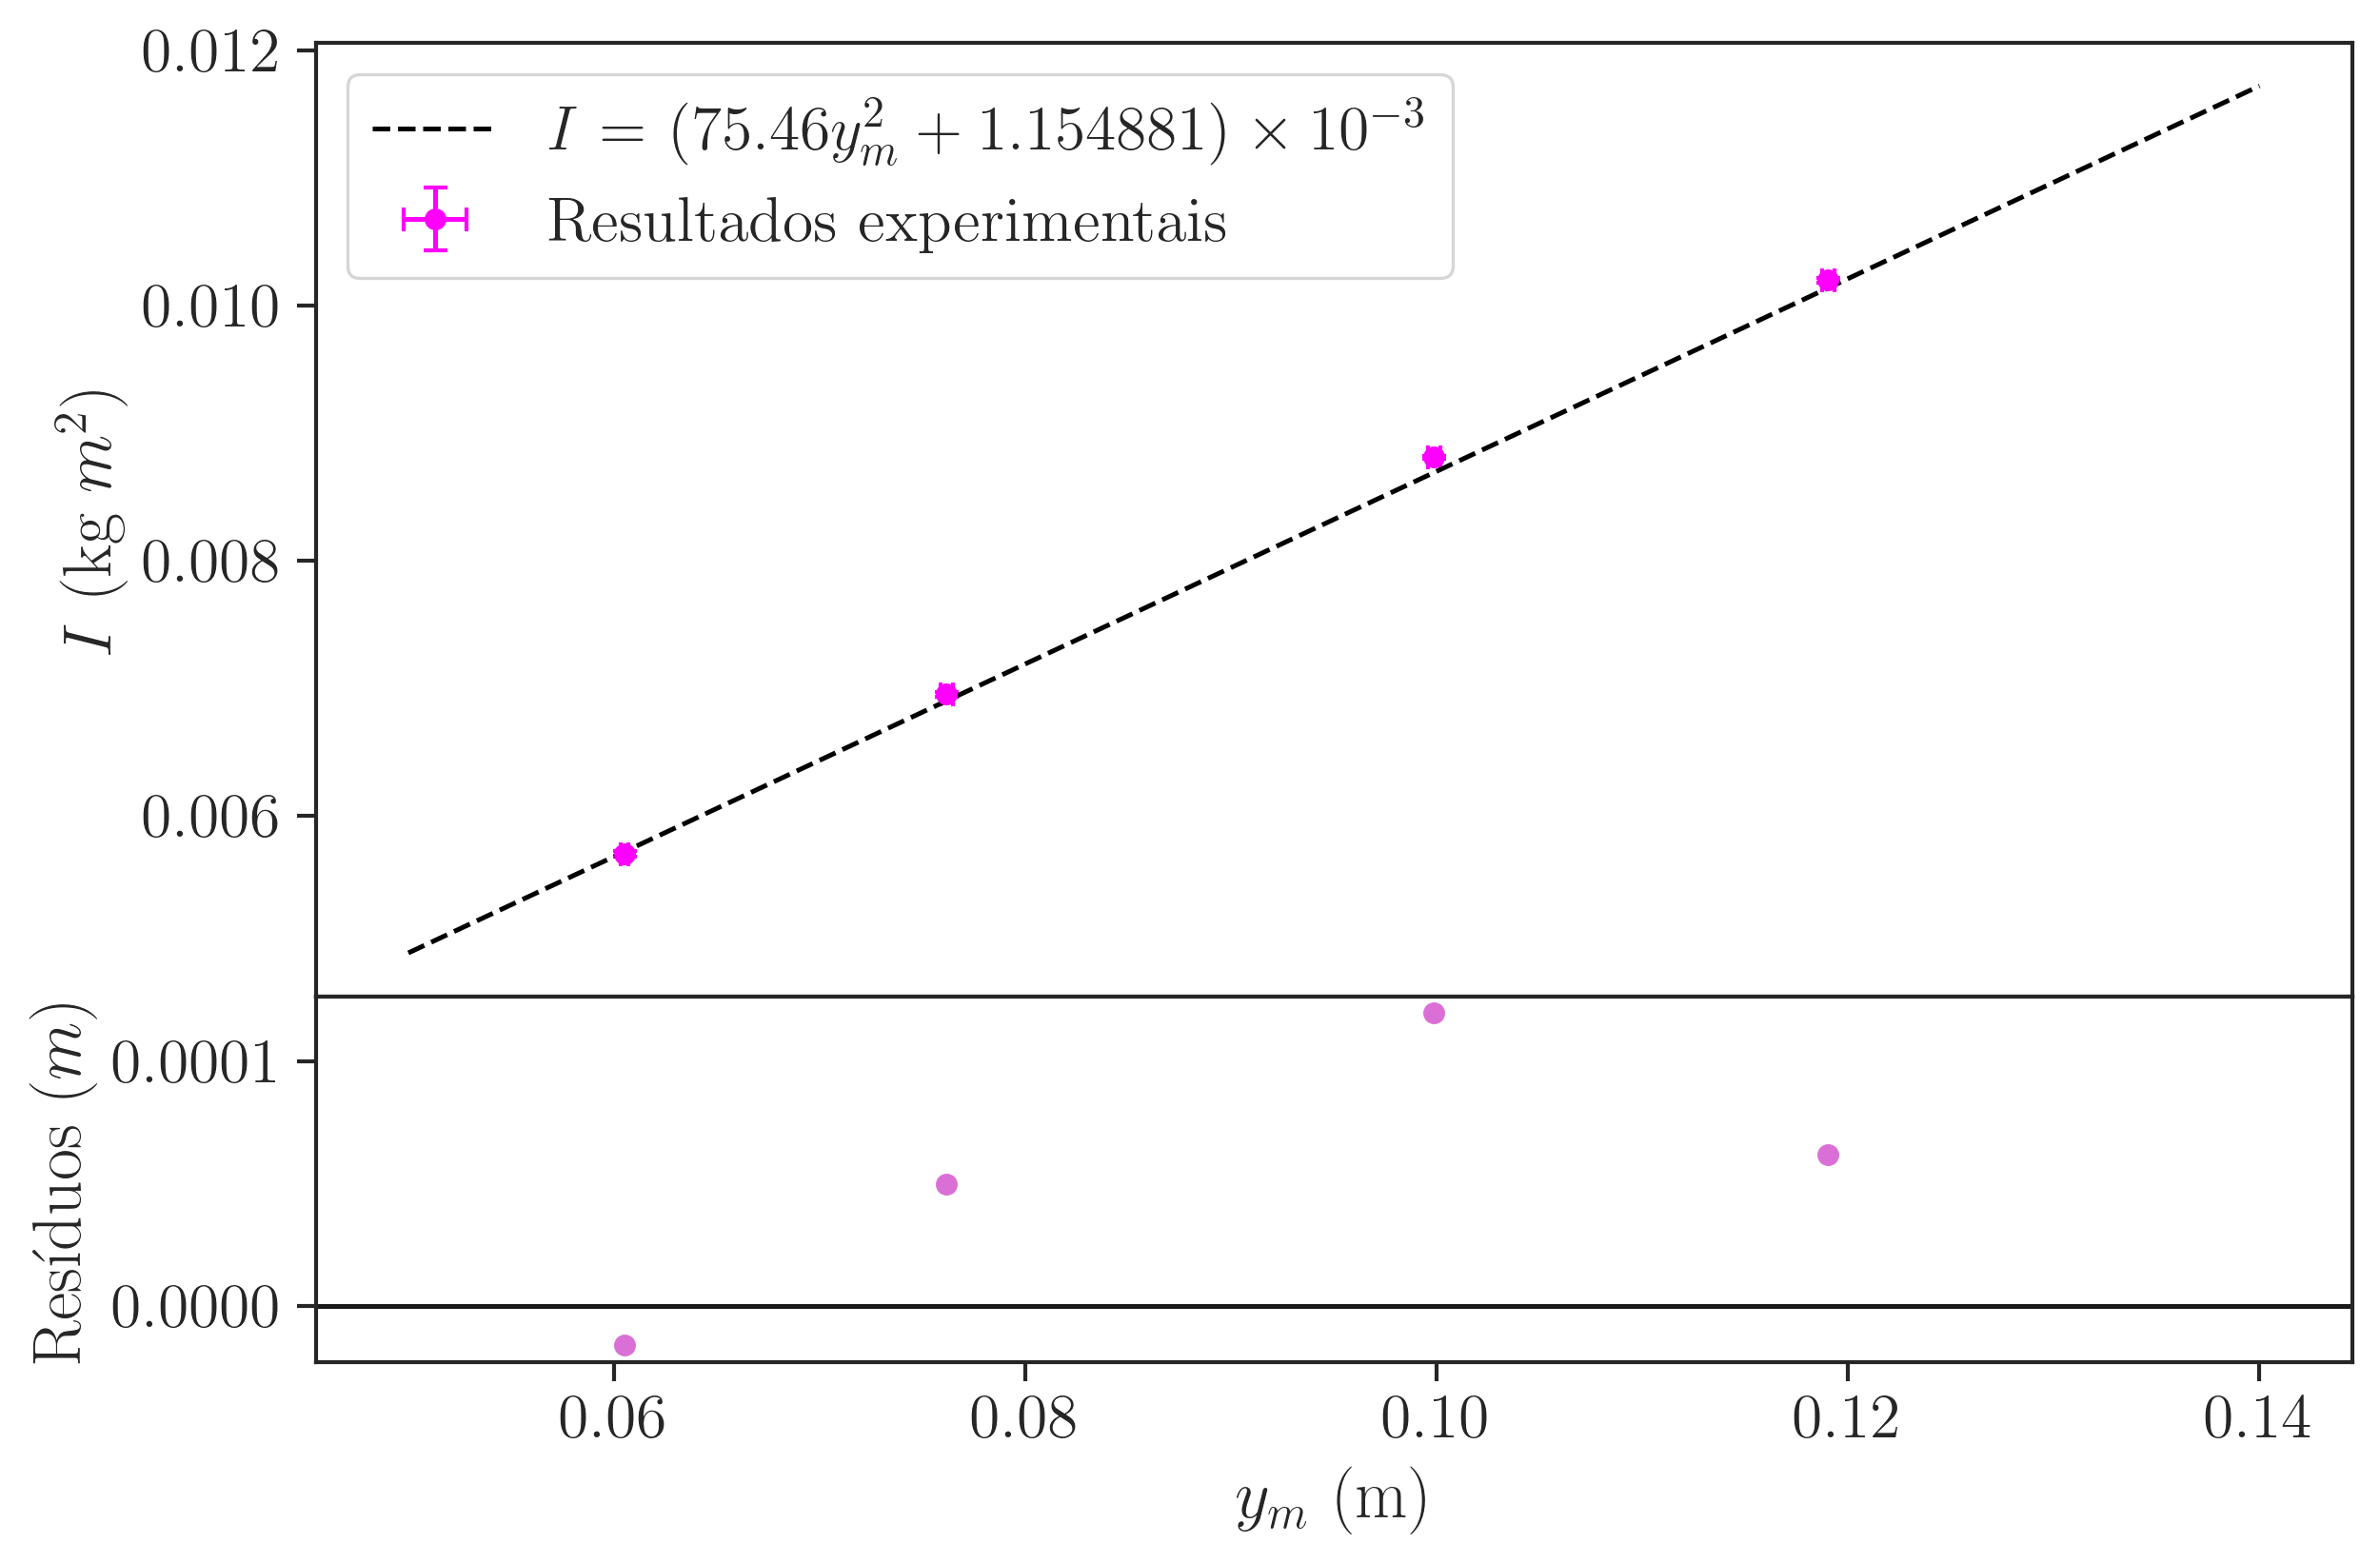

In [97]:
fig = plt.figure(figsize = [9.2,6], dpi = 300) 
gs = fig.add_gridspec(2,1, hspace=0, height_ratios=[6, 2.3])
axs = gs.subplots(sharex=True)

#Gráfico principal
x = np.linspace(0.05, 0.14, 100)
axs[0].errorbar(y_m_sq,inertia_m, sigma_inertia_m,sigma_y_m_sq, 'o', ms = 4.5, capsize=3, 
                color = 'magenta', label = 'Resultados experimentais' )
axs[0].plot(x, x* 75.46e-3 + 0.001154881,  color ='black', ls = '--',
         label = r'$I$ = ($75.46 y_m^2 + 1.154881)\times 10^{-3}$')

axs[0].set_ylabel(r'$I$ (kg $m^2$)')
axs[0].legend()
axs[0].set_title('')


#Gráfico de resíduos
yhat = np.polyval([75.46e-3, 0.001154881], y_m_sq)
axs[1] = plt.subplot(gs[1])
resid = (inertia_m - yhat)
axs[1].plot(y_m_sq, resid, 'o',ms = 4.5,  color = 'orchid', label = 'Residuos')
axs[1].axhline(y=0, color='k', linestyle='-')
axs[1].set_ylabel(r"Resíduos ($m$)")


plt.xlabel(r'$y_m$ (m)')


plt.show()

In [96]:
#Calulando chi^2_red
chi_squared = np.sum(((yhat - inertia_m)/sigma_inertia_m) ** 2)
chi2_red = chi_squared/(len(inertia_m)-2)

#Imprimindo o resultado
print("chi^2_red = %.3f" % chi2_red)

chi^2_red = 80.023
